**code below will calculate METEOR score sentence by sentence**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.translate import meteor_score

# Open the reference and candidate text files
with open('test.txt', 'r') as ref_file, open('gen.txt', 'r') as cand_file:
    # Read the contents of the files
    ref_lines = ref_file.readlines()
    cand_lines = cand_file.readlines()

# Open the result file in write mode
with open('meteor_line_by_line.txt', 'w') as result_file:
    # Calculate the METEOR score for each line
    for ref_line, cand_line in zip(ref_lines, cand_lines):
        # Tokenize the reference and candidate sentences
        ref_sentences = nltk.sent_tokenize(ref_line)
        cand_sentences = nltk.sent_tokenize(cand_line)

        # Calculate the METEOR score for the entire line
        ref_tokens = []
        for ref_sentence in ref_sentences:
            ref_tokens.extend(nltk.word_tokenize(ref_sentence.lower()))
        cand_tokens = []
        for cand_sentence in cand_sentences:
            cand_tokens.extend(nltk.word_tokenize(cand_sentence.lower()))

        meteor = meteor_score.meteor_score([ref_tokens], cand_tokens)

        # Write the reference, candidate, and METEOR score to the result file
        #result_file.write("Reference: " + ref_line + "\n")
        #result_file.write("Candidate: " + cand_line + "\n")
        result_file.write("" + str(meteor) + "\n")
        #result_file.write("\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**calculating METEOR score for Urdu through custom tokenization**

In [ ]:
import nltk
from nltk.translate import meteor_score

# Download necessary resources only if not already present
nltk.download('wordnet', quiet=True)

# Function to tokenize sentences based on spaces (custom tokenization for Urdu)
def custom_tokenize(sentence):
    return sentence.split()

# Open the reference and candidate text files
with open('test.txt', 'r', encoding='utf-8') as ref_file, open('gen.txt', 'r', encoding='utf-8') as cand_file:
    ref_lines = ref_file.readlines()
    cand_lines = cand_file.readlines()

# Ensure the number of reference and candidate lines is the same
if len(ref_lines) != len(cand_lines):
    raise ValueError("The number of reference lines and candidate lines should be the same.")

# Initialize variables for average METEOR score
total_meteor_score = 0
num_sentences = len(ref_lines)

# Open the result file in write mode
with open('meteor_line_by_line_gen.txt', 'w', encoding='utf-8') as result_file:
    # Calculate the METEOR score for each sentence
    for ref_line, cand_line in zip(ref_lines, cand_lines):
        # Custom tokenization using space as delimiter
        ref_tokens = custom_tokenize(ref_line.strip())
        cand_tokens = custom_tokenize(cand_line.strip())

        # Calculate METEOR score
        meteor = meteor_score.meteor_score([ref_tokens], cand_tokens)

        # Write sentence-level METEOR score to the result file
        #result_file.write(f"Sentence METEOR Score: {meteor}\n")
        result_file.write(f"{meteor}\n")

        # Add the score to the total for overall average calculation
        total_meteor_score += meteor

# Calculate the average METEOR score
average_meteor_score = total_meteor_score / num_sentences

# Write the overall average METEOR score to the result file
with open('meteor_line_by_line_gen.txt', 'a', encoding='utf-8') as result_file:
    result_file.write(f"\nOverall Average METEOR Score: {average_meteor_score}\n")

print(f"Overall Average METEOR Score: {average_meteor_score}")


Overall Average METEOR Score: 0.42981844083919835


**Code below will calculate CIDEr score sentence by sentence**

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def read_sentences_from_file(file_path):
    with open(file_path, 'r') as file:
        sentences = file.readlines()
    sentences = [sentence.strip() for sentence in sentences]
    return sentences

def compute_cider_score(generated_sentence, reference_sentences):
    # Preprocess the sentences
    generated_sentence = generated_sentence.lower()
    reference_sentences = [sent.lower() for sent in reference_sentences]

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer on the reference sentences
    vectorizer.fit(reference_sentences)

    # Transform the generated sentence and reference sentences into TF-IDF vectors
    generated_vector = vectorizer.transform([generated_sentence])
    reference_vectors = vectorizer.transform(reference_sentences)

    # Calculate the cosine similarity between the generated vector and reference vectors
    similarities = cosine_similarity(generated_vector, reference_vectors)[0]

    # Compute the CIDEr score as the average cosine similarity
    cider_score = sum(similarities) / len(similarities)
    return cider_score

# Example usage
generated_sentences = read_sentences_from_file("train.txt")
reference_sentences = read_sentences_from_file("test.txt")

output_file = open("cider.txt", "w")
for generated_sentence in generated_sentences:
    cider_score = compute_cider_score(generated_sentence, reference_sentences)
    #output_file.write("Generated Sentence: {}\n".format(generated_sentence))
    #output_file.write("CIDEr score: {}\n".format(cider_score))
    output_file.write("{}\n".format(cider_score))
    #output_file.write("\n")
output_file.close()


**code below will calculate ROUGE score sentence by sentence**

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge
import nltk

def calculate_rouge_l_scores(reference_file, hypothesis_file, output_file):
    rouge = Rouge()

    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(hypothesis_file, 'r', encoding='utf-8') as hyp_file, \
         open(output_file, 'w', encoding='utf-8') as out_file:

        ref_sentences = ref_file.readlines()
        hyp_sentences = hyp_file.readlines()

        # Calculate ROUGE-L scores for each sentence and save them in the output file
        for ref_sent, hyp_sent in zip(ref_sentences, hyp_sentences):
            ref_sent = ref_sent.strip()
            hyp_sent = hyp_sent.strip()

            score = rouge.get_scores(hyp_sent, ref_sent)[0]['rouge-l']['f']
            #out_file.write(f"ROUGE-L Score: {score}\n")
            out_file.write(f"{score}\n")

    print(f"ROUGE-L scores saved in {output_file}.")

# Example usage
reference_file = 'test.txt'
hypothesis_file = 'w_aug.txt'
output_file = 'rouge-score.txt'

calculate_rouge_l_scores(reference_file, hypothesis_file, output_file)


ROUGE-L scores saved in rouge1.txt.


**Rouge for Urdu using Custom Tokenization**

In [ ]:
from rouge import Rouge

# Function to tokenize sentences based on spaces (custom tokenization for Urdu)
def custom_tokenize(sentence):
    return sentence.split()

def calculate_rouge_l_scores(reference_file, hypothesis_file, output_file):
    rouge = Rouge()

    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(hypothesis_file, 'r', encoding='utf-8') as hyp_file, \
         open(output_file, 'w', encoding='utf-8') as out_file:

        ref_sentences = ref_file.readlines()
        hyp_sentences = hyp_file.readlines()

        # Initialize total score for averaging
        total_rouge_l_score = 0
        num_sentences = len(ref_sentences)

        # Calculate ROUGE-L scores for each sentence and save them in the output file
        for ref_sent, hyp_sent in zip(ref_sentences, hyp_sentences):
            # Custom tokenization using space as delimiter
            ref_tokens = " ".join(custom_tokenize(ref_sent.strip()))
            hyp_tokens = " ".join(custom_tokenize(hyp_sent.strip()))

            # Calculate ROUGE-L score for the current sentence
            score = rouge.get_scores(hyp_tokens, ref_tokens)[0]['rouge-l']['f']

            # Write sentence-level ROUGE-L score to output file
            out_file.write(f"{score}\n")

            # Add to total score for average calculation
            total_rouge_l_score += score

        # Calculate overall average ROUGE-L score
        average_rouge_l_score = total_rouge_l_score / num_sentences

        # Write the overall average ROUGE-L score to the output file
        out_file.write(f"\nOverall Average ROUGE-L Score: {average_rouge_l_score}\n")

    print(f"ROUGE-L scores saved in {output_file}.")

# Example usage
reference_file = 'test.txt'
hypothesis_file = 'gen.txt'
output_file = 'rouge-score.txt'

calculate_rouge_l_scores(reference_file, hypothesis_file, output_file)


ROUGE-L scores saved in rouge-score.txt.


**Code below will calculate NIST score sentence by sentence.**

In [ ]:
import nltk

def calculate_nist_score(ref_sentence, hyp_sentence, n=4):
    ref_tokens = nltk.word_tokenize(ref_sentence)
    hyp_tokens = nltk.word_tokenize(hyp_sentence)

    ref_ngrams = nltk.ngrams(ref_tokens, n)
    hyp_ngrams = nltk.ngrams(hyp_tokens, n)

    ref_ngram_counts = nltk.FreqDist(ref_ngrams)
    hyp_ngram_counts = nltk.FreqDist(hyp_ngrams)

    clipped_counts = {
        ngram: min(hyp_ngram_counts[ngram], ref_ngram_counts[ngram])
        for ngram in hyp_ngram_counts
    }

    numerator = sum(clipped_counts.values())
    denominator = sum(hyp_ngram_counts.values())

    nist_score = numerator / denominator if denominator != 0 else 0.0

    return nist_score

def calculate_sentence_scores(ref_sentences, hyp_sentences):
    sentence_scores = []
    for ref_sentence, hyp_sentence in zip(ref_sentences, hyp_sentences):
        score = calculate_nist_score(ref_sentence, hyp_sentence)
        sentence_scores.append(score)
    return sentence_scores

nltk.download('punkt')

# Read reference sentences from a text file
with open('test.txt', 'r', encoding='utf-8') as ref_file:
    ref_sentences = ref_file.readlines()

# Read hypothesis sentences from a text file
with open('train.txt', 'r', encoding='utf-8') as hyp_file:
    hyp_sentences = hyp_file.readlines()

# Calculate sentence scores
scores = calculate_sentence_scores(ref_sentences, hyp_sentences)

# Save sentence scores in a text file
with open('nist.txt', 'w', encoding='utf-8') as scores_file:
    for score in scores:
        scores_file.write(str(score) + '\n')

print("Sentence scores saved in scores.txt file.")


**Code below will calculate the BLEU score sentence by sentence**

In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 9.9 MB/s eta 0:00:00


**sentence by sentence BLEU score**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.translate import bleu_score

def calculate_sentence_bleu(reference, candidate):
    reference = [nltk.word_tokenize(sentence) for sentence in reference]
    candidate = nltk.word_tokenize(candidate)
    return bleu_score.sentence_bleu(reference, candidate)

def calculate_and_save_bleu_scores(reference_file, candidate_file, output_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file, \
         open(output_file, 'w', encoding='utf-8') as out_file:

        reference_sentences = [line.strip() for line in ref_file.readlines()]
        candidate_sentences = [line.strip() for line in can_file.readlines()]

        for ref_sentence, can_sentence in zip(reference_sentences, candidate_sentences):
            bleu_score = calculate_sentence_bleu([ref_sentence], can_sentence)
            out_file.write(f"BLEU Score: {bleu_score:.4f} - Reference: {ref_sentence} - Candidate: {can_sentence}\n")

if __name__ == "__main__":
    reference_file_path = "test.txt"
    candidate_file_path = "gen.txt"
    output_file_path = "bleu-gen.txt"

    calculate_and_save_bleu_scores(reference_file_path, candidate_file_path, output_file_path)

    print("BLEU scores saved to:", output_file_path)


BLEU scores saved to: bleu-gen.txt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**for Urdu Text, calculating sentece wise BLEU score.**

In [ ]:
!pip install nltk

**BLEU score based on custom tokenization.**

In [ ]:
from nltk.translate import bleu_score

# Function to calculate BLEU score with word overlap
def calculate_word_overlap_bleu(reference, candidate):
    reference_tokens = reference.split()  # Custom tokenization based on spaces
    candidate_tokens = candidate.split()

    # Calculate BLEU score (BLEU-1)
    word_overlap_bleu = bleu_score.sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0))

    return word_overlap_bleu

# Function to calculate and save BLEU scores (sentence-by-sentence and overall average)
def calculate_and_save_bleu_scores(reference_file, candidate_file, output_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file, \
         open(candidate_file, 'r', encoding='utf-8') as can_file, \
         open(output_file, 'w', encoding='utf-8') as out_file:

        reference_sentences = [line.strip() for line in ref_file.readlines()]
        candidate_sentences = [line.strip() for line in can_file.readlines()]

        total_bleu_score = 0
        num_sentences = len(reference_sentences)

        # Calculate BLEU score for each sentence
        for ref_sentence, can_sentence in zip(reference_sentences, candidate_sentences):
            word_overlap_bleu = calculate_word_overlap_bleu(ref_sentence, can_sentence)

            # Write sentence-level BLEU score to output file
            out_file.write(f"{word_overlap_bleu:.4f}\n")

            # Add to total BLEU score
            total_bleu_score += word_overlap_bleu

        # Calculate overall average BLEU score
        average_bleu_score = total_bleu_score / num_sentences

        # Write overall average BLEU score to output file
        out_file.write(f"\nOverall Average BLEU Score: {average_bleu_score:.4f}\n")

    print("Word Overlap BLEU scores saved to:", output_file)

# Example usage
if __name__ == "__main__":
    reference_file_path = "test.txt"
    candidate_file_path = "gen.txt"
    output_file_path = "bleu_wo_aug.txt"

    calculate_and_save_bleu_scores(reference_file_path, candidate_file_path, output_file_path)

    print("Word Overlap BLEU scores saved to:", output_file_path)


Word Overlap BLEU scores saved to: bleu_wo_aug.txt
Word Overlap BLEU scores saved to: bleu_wo_aug.txt


**Make two txt files. One with reference and otherone as translation of neural model.**

In [ ]:
!python3 bleu.py test.txt gen.txt

Reference 1st sentence: È pigro.
È pigro. 	--->	 Lui è pigro.
31.947155212313625 

È ovvio. 	--->	 È ovvio.
100.00000000000004 

Aspetti! 	--->	 Aspettate.
0.0 

È enorme. 	--->	 È enorme.
100.00000000000004 

Tom urlò. 	--->	 Tom urlò.
100.00000000000004 

Lei provò. 	--->	 Lei provò.
100.00000000000004 

Tom esitò. 	--->	 Tom esitò.
100.00000000000004 

Ha freddo. 	--->	 Lei è fredda.
15.97357760615681 

Sarà duro. 	--->	 Sarà difficile.
34.66806371753173 

È testarda. 	--->	 Lei è testarda.
31.947155212313625 

È obsoleto. 	--->	 È sovrapparente.
34.66806371753173 

Tom lavora. 	--->	 Tom lavora adesso.
35.35533905932737 

Sono gialle 	--->	 È giallo.
0.0 

Io mangiai. 	--->	 Io ho mangiato.
18.99589214128981 

È corretto. 	--->	 È corretta.
34.66806371753173 

Tom sorrise. 	--->	 Tom sorrise.
100.00000000000004 

È umiliante. 	--->	 È umiliante.
100.00000000000004 

Tom è forte. 	--->	 Tom è forte.
100.00000000000004 

Lui mi odia. 	--->	 Lui mi odia.
100.00000000000004 

È rilevan

In [ ]:
!rm bleu*

rm: cannot remove 'sample_data': Is a directory


**create compute-bleu-sentence-args.py file and copy code given below in it.**

In [ ]:
# BLEU for segment by segment with arguments
# Run this file from CMD/Terminal
# Example Command: python3 compute-bleu-sentence-args.py test_file_name.txt mt_file_name.txt

import sys
import sacrebleu
from sacremoses import MosesDetokenizer
md = MosesDetokenizer(lang='en')

target_test = sys.argv[1]  # Test file argument
target_pred = sys.argv[2]  # MTed file argument

# Open the test dataset human translation file and detokenize the references
refs = []

with open(target_test) as test:
    for line in test:
        line = line.strip().split()
        line = md.detokenize(line)
        refs.append(line)

print("Reference 1st sentence:", refs[0])

# Open the translation file by the NMT model and detokenize the predictions
preds = []

with open(target_pred) as pred:
    for line in pred:
        line = line.strip().split()
        line = md.detokenize(line)
        preds.append(line)

# Calculate BLEU for sentence by sentence and save the result to a file
with open("bleu-" + target_pred + ".txt", "w+") as output:
    for line in zip(refs,preds):
        test = line[0]
        pred = line[1]
        print(test, "\t--->\t", pred)
        bleu = sacrebleu.sentence_bleu(pred, [test], smooth_method='exp')
        print(bleu.score, "\n")
        output.write(str(bleu.score) + "\n")

**Drawing histogram of BLEU scores**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

f= np.loadtxt('bleu-unlex-char.txt', unpack='False')

# set bins' interval for your data
# You have following intervals:
# 1st col is number of data elements in [0,10000);
# 2nd col is number of data elements in [10000, 20000);
# ...
# last col is number of data elements in [100000, 200000];
bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(f, histtype='bar', bins = bins, color = "lightblue", ec="red")
plt.xlabel('BLEU Score Range')
plt.ylabel('Number of Translation Samples')
plt.title('Char-Level Distribution of BLEU Scores')
plt.legend()
plt.show()

**for word-score**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

f= np.loadtxt('bleu-unlex-word.txt', unpack='False')

# set bins' interval for your data
# You have following intervals:
# 1st col is number of data elements in [0,10000);
# 2nd col is number of data elements in [10000, 20000);
# ...
# last col is number of data elements in [100000, 200000];
bins = [0,10,20,30,40,50,60,70,80,90,100]

plt.hist(f, histtype='bar', bins = bins, color = "lightblue", ec="red")
plt.xlabel('BLEU Score Range')
plt.ylabel('Number of Translation Samples')
plt.title('Word-Level Distribution of BLEU Scores')
plt.legend()
plt.show()

**code to read text and save in excel file**

In [ ]:
with open('unlexical-word.txt') as f1:
    lines = [line.rstrip() for line in f1]

with open('test.txt') as f2:
    lines2 = [line.rstrip() for line in f2]

with open('bleu-unlex-word.txt') as f3:
    lines3 = [line.rstrip() for line in f3]


print(type(lines))
print(type(lines2))
print(type(lines3))


<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
!pip install pandas
!pip install xlsxwriter

In [ ]:
import pandas as pd
import xlsxwriter

data = {'unlex-word-data': lines}

df = pd.DataFrame(data)

df['test-data'] = lines2
df['BLEU-Scores'] = lines3

print(df)
writer = pd.ExcelWriter('test-word.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Unlex-Word-Data', index=False)
writer.save()

**now, reading excel file to display outputs for low BLEU scores**

In [ ]:
import openpyxl
from pathlib import Path

xlsx_file = Path('', 'test-word.xlsx')
wb_obj = openpyxl.load_workbook(xlsx_file)
sheet = wb_obj.active

col_names = []
for column in sheet.iter_cols(1, sheet.max_column):
    col_names.append(column[0].value)


print(col_names)

In [ ]:
df = pd.read_excel('test-word.xlsx', sheet_name=0) #reads the first sheet of your excel file
print(df)
print(type(df))

In [ ]:
print(len(df.query("`BLEU-Scores` >= 0 and `BLEU-Scores` <= 10")))

print(df.query("`BLEU-Scores` >= 0 and `BLEU-Scores` <= 10"))



In [ ]:
print(len(df.query("`BLEU-Scores` >= 11 and `BLEU-Scores` <= 20")))

print(df.query("`BLEU-Scores` >= 11 and `BLEU-Scores` <= 20"))



In [ ]:
print(len(df.query("`BLEU-Scores` >= 21 and `BLEU-Scores` <= 30")))

print(df.query("`BLEU-Scores` >= 21 and `BLEU-Scores` <= 30"))


In [ ]:
print(len(df.query("`BLEU-Scores` >= 31 and `BLEU-Scores` <= 40")))

print(df.query("`BLEU-Scores` >= 31 and `BLEU-Scores` <= 40"))


In [ ]:
print(len(df.query("`BLEU-Scores` >= 41 and `BLEU-Scores` <= 50")))

print(df.query("`BLEU-Scores` >= 41 and `BLEU-Scores` <= 50"))


In [ ]:
print(len(df.query("`BLEU-Scores` >= 51 and `BLEU-Scores` <= 60")))

print(df.query("`BLEU-Scores` >= 51 and `BLEU-Scores` <= 60"))


In [ ]:
print(len(df.query("`BLEU-Scores` >= 61 and `BLEU-Scores` <= 70")))

print(df.query("`BLEU-Scores` >= 61 and `BLEU-Scores` <= 70"))


In [ ]:
print(len(df.query("`BLEU-Scores` >= 71 and `BLEU-Scores` <= 80")))

print(df.query("`BLEU-Scores` >= 71 and `BLEU-Scores` <= 80"))


In [ ]:
print(len(df.query("`BLEU-Scores` >= 81 and `BLEU-Scores` <= 90")))

print(df.query("`BLEU-Scores` >= 81 and `BLEU-Scores` <= 90"))


In [ ]:
print(len(df.query("`BLEU-Scores` >= 91 and `BLEU-Scores` <= 100")))

print(df.query("`BLEU-Scores` >= 91 and `BLEU-Scores` <= 100"))


**removing comments along with DRSs from test.txt file.**

In [ ]:
import re

def remove_comments(input_drs):
    # Remove inline comments
    cleaned_drs = re.sub(r'%[^\n]*', '', input_drs)
    # Remove comments at the beginning of the DRS block (if any)
    cleaned_drs = cleaned_drs.strip()
    return cleaned_drs

def clean_drs_file(input_file, output_file):
    with open(input_file, 'r') as f:
        drs_data = f.read()

    drs_list = drs_data.split('\n\n')  # Assuming DRSs are separated by empty lines in the input file

    cleaned_drs_list = []
    for drs in drs_list:
        cleaned_drs_list.append(remove_comments(drs))

    cleaned_drs_data = '\n\n'.join(cleaned_drs_list)

    with open(output_file, 'w') as f:
        f.write(cleaned_drs_data)

input_file_path = 'input.txt'
output_file_path = 'output_drs.txt'

clean_drs_file(input_file_path, output_file_path)


**calculating chrF score for urdu generation.**

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 10.4 MB/s eta 0:00:00


In [ ]:
from torchmetrics.functional.text import chrf_score

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.readlines()
    return [line.strip() for line in content]

def calculate_chrf_score(preds_file, target_file):
    # Read content from files
    preds = read_file(preds_file)
    target = read_file(target_file)

    # Calculate chrf score for each line
    chrf_results = [chrf_score([pred], [tar]).item() for pred, tar in zip(preds, target)]

    # Calculate the average chrf score
    average_chrf_score = sum(chrf_results) / len(chrf_results)

    return average_chrf_score

# Replace 'preds.txt' and 'target.txt' with your file names
preds_file = 'pars-gen.txt'
target_file = 'test.txt'

# Calculate and print the average chrf score
average_chrf_score = calculate_chrf_score(preds_file, target_file)
print(f"Average chrf score: {average_chrf_score}")


Average chrf score: 0.841398274502141


calculating sentence by sentence score

In [ ]:
from torchmetrics.functional.text import chrf_score

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.readlines()
    return [line.strip() for line in content]

def calculate_and_save_chrf_scores(preds_file, target_file, output_file):
    # Read content from files
    preds = read_file(preds_file)
    target = read_file(target_file)

    with open(output_file, 'w', encoding='utf-8') as out_file:
        for pred, tar in zip(preds, target):
            # Calculate chrf score for each line
            chrf_score_value = chrf_score([pred], [tar]).item()

            # Save the chrf score to the output file
            out_file.write(f"{chrf_score_value:.4f}\n")

if __name__ == "__main__":
    # Replace 'gen_aug.txt', 'ref.txt', and 'chrF_scores.txt' with your file names
    preds_file = 'gen.txt'
    target_file = 'test.txt'
    output_file = 'chrF-score.txt'

    # Calculate and save the chrF scores sentence by sentence
    calculate_and_save_chrf_scores(preds_file, target_file, output_file)

    print("chrF scores saved to:", output_file)


chrF scores saved to: chrF-score.txt


**Calculating BERT-Score**

using automatic way, and sentence by sentence.

In [ ]:
# install pytorch and huggingface transformers if you havn't done so
!pip install torch
!pip install transformers

In [ ]:
# if you have not installed bert_score, it is very easy
# simply uncomment the line below to install through pip
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
from bert_score import score

In [ ]:
with open("gen.txt") as f:
    cands = [line.strip() for line in f]

with open("test.txt") as f:
    refs = [line.strip() for line in f]

In [ ]:
cands[0]

'درخت کی گھوڑی سے اسے ہاتھ مار گئی۔'

In [ ]:
# When you are running this cell for the first time,
# it will download the BERT model which will take relatively longer.
# for Urdu, lang="others" and for English, lang="en"
P, R, F1 = score(cands, refs, lang="others", verbose=True)

calculating scores...
computing bert embedding.


  0%|          | 0/27 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/15 [00:00<?, ?it/s]

done in 85.88 seconds, 10.48 sentences/sec


In [ ]:
F1

tensor([0.7223, 1.0000, 0.6921, 0.8121, 0.8693, 0.7816, 0.8702, 0.7487, 0.7763,
        0.7931, 0.7483, 0.8844, 0.8080, 0.8588, 0.9567, 0.7436, 0.8327, 1.0000,
        0.8388, 0.7712, 0.8943, 0.8432, 0.7556, 0.8668, 0.9568, 0.7516, 0.7753,
        0.7429, 1.0000, 0.7553, 1.0000, 1.0000, 0.7819, 1.0000, 0.9604, 0.6955,
        0.9069, 0.9722, 0.8657, 0.8825, 0.8218, 1.0000, 1.0000, 0.7845, 0.8698,
        0.8699, 0.7988, 0.8103, 1.0000, 0.8670, 0.8552, 1.0000, 1.0000, 0.8980,
        0.7862, 0.8174, 0.8786, 0.7356, 0.8373, 1.0000, 0.8220, 1.0000, 0.8133,
        1.0000, 0.8456, 0.8257, 1.0000, 0.8331, 0.7657, 0.8550, 0.7741, 0.7423,
        1.0000, 0.7129, 0.7825, 0.6910, 0.8142, 0.8897, 1.0000, 0.7983, 0.8408,
        0.8774, 1.0000, 0.8827, 0.9163, 0.7467, 0.8516, 1.0000, 1.0000, 0.9196,
        0.9083, 0.8304, 0.9020, 0.9364, 0.8485, 0.9531, 0.9233, 0.9628, 0.8790,
        1.0000, 1.0000, 0.8599, 0.8301, 0.8768, 0.8161, 0.8333, 1.0000, 0.7788,
        0.8634, 0.8209, 0.8985, 0.8083, 

In [ ]:
import torch

def save_scores_to_file(scores, output_file):
    with open(output_file, 'w', encoding='utf-8') as out_file:
        for score in scores:
            # Convert the tensor value to a float and save to the output file
            out_file.write(f"{score:.4f}\n")

# Example usage
# Replace 'bert_scores_tensor' and 'bert_scores.txt' with your tensor and desired output file
bert_scores_tensor = F1
# bert_scores_tensor = torch.tensor(copy torch F1 score here)

output_file = 'bert_scores-gen.txt'

# Convert the tensor to a list and save BERT scores line by line to a file
bert_scores_list = bert_scores_tensor.tolist()
save_scores_to_file(bert_scores_list, output_file)


using github directory...

In [ ]:
!git clone https://github.com/Tiiiger/bert_score


In [ ]:
cd bert_score


/content/bert_score


In [ ]:
!pip install .

In [ ]:
!python -m unittest discover


for 'Urdu' specifically, we mention multi-lingual BERT model 'bert-base-multilingual-cased'.

In [ ]:
!bert-score -r ../test.txt -c ../train_wo_aug.txt --model bert-base-multilingual-cased

tokenizer_config.json: 100% 29.0/29.0 [00:00<00:00, 134kB/s]
config.json: 100% 625/625 [00:00<00:00, 3.09MB/s]
vocab.txt: 100% 996k/996k [00:00<00:00, 15.7MB/s]
tokenizer.json: 100% 1.96M/1.96M [00:00<00:00, 26.0MB/s]
model.safetensors: 100% 714M/714M [00:06<00:00, 106MB/s]
bert-base-multilingual-cased_L9_no-idf_version=0.3.12(hug_trans=4.35.2)_fast-tokenizer P: 0.854723 R: 0.853493 F1: 0.853797


**calculating COMET score for urdu generation.**

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install unbabel-comet

In [ ]:
!pip install evaluate

In [ ]:
from dataclasses import dataclass
from typing import Optional

import comet  # From: unbabel-comet
import datasets
import torch

import evaluate

In [ ]:
from evaluate import load
#comet_metric = load('metrics/comet/comet.py')
comet_metric = load('comet')
comet_metric = load('comet', 'wmt-large-hter-estimator')
source = ["Dem Feuer konnte Einhalt geboten werden", "Schulen und Kindergärten wurden eröffnet."]
hypothesis = ["The fire could be stopped", "Schools and kindergartens were open"]
reference = ["They were able to control the fire.", "Schools and kindergartens opened"]
predictions = comet_metric.compute(predictions=hypothesis, references=reference, sources=source)
predictions['scores']

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.1.3. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`


In [ ]:
#from comet import comet_score
from evaluate import load
#comet_metric = load('metrics/comet/comet.py')
comet_metric = load('comet')

# Load reference and generated text from files
with open('ref.txt', 'r', encoding='utf-8') as file:
    reference_text = file.read()

with open('output.txt', 'r', encoding='utf-8') as file:
    generated_text = file.read()

# Calculate COMET score
#score = comet_score(reference_text, generated_text, language='urdu')

#predictions = comet_metric.compute(predictions=hypothesis, references=reference, sources=source)
predictions = comet_metric.compute(predictions=reference_text, references=reference_text, sources=reference_text)
predictions['scores']

#print(f"COMET Score: {score}")


filtering SMATCH data

In [ ]:
def remove_line_numbers(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as infile, \
         open(output_file, 'w', encoding='utf-8') as outfile:
        for line in infile:
            # Split each line at ':' and keep only the part after the colon
            parts = line.split(':')
            if len(parts) == 2:
                try:
                    # Attempt to convert the part after the colon to a float
                    float_value = float(parts[1].strip())
                    outfile.write(f"{float_value:.15f}\n")
                except ValueError:
                    # Handle cases where the conversion to float fails
                    print(f"Warning: Skipping line due to invalid format: {line}")

# Example usage
input_file_path = 'par_w_aug.txt'
output_file_path = 'smatch1.txt'

remove_line_numbers(input_file_path, output_file_path)


**Plots for Gen-Pars and Pars-Gen**

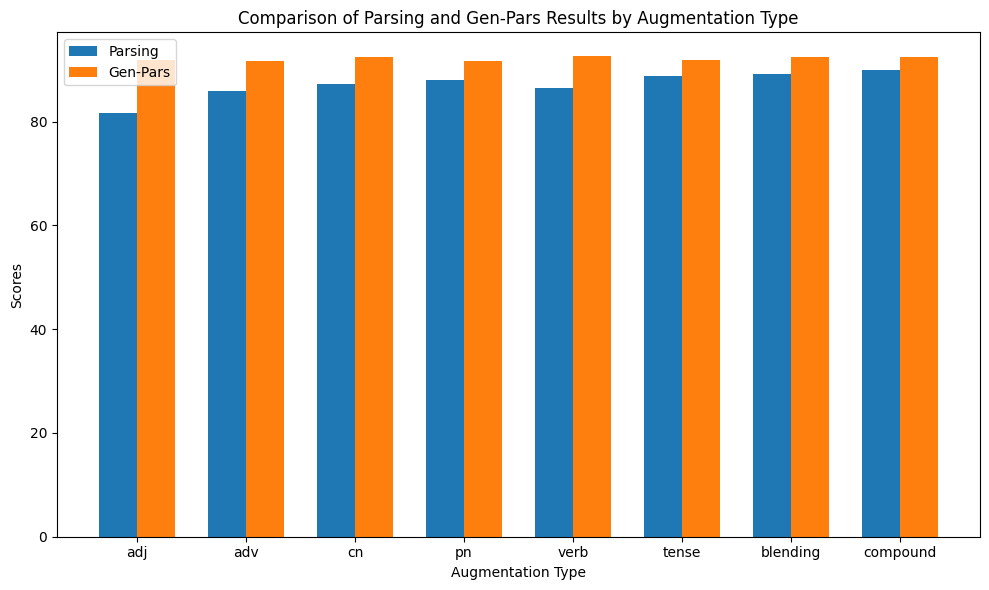

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
augmentation_types = ['adj', 'adv', 'cn', 'pn', 'verb', 'tense', 'blending', 'compound']
parsing_scores = [81.74, 85.88, 87.21, 87.91, 86.52, 88.84, 89.12, 90.01]
gen_pars_scores = [91.81, 91.61, 92.34, 91.74, 92.56, 91.93, 92.51, 92.51]

# Set up bar positions
bar_width = 0.35
index = np.arange(len(augmentation_types))

# Plotting
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, parsing_scores, bar_width, label='Parsing')
bar2 = plt.bar(index + bar_width, gen_pars_scores, bar_width, label='Gen-Pars')

# Adding labels
plt.xlabel('Augmentation Type')
plt.ylabel('Scores')
plt.title('Comparison of Parsing and Gen-Pars Results by Augmentation Type')
plt.xticks(index + bar_width / 2, augmentation_types)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


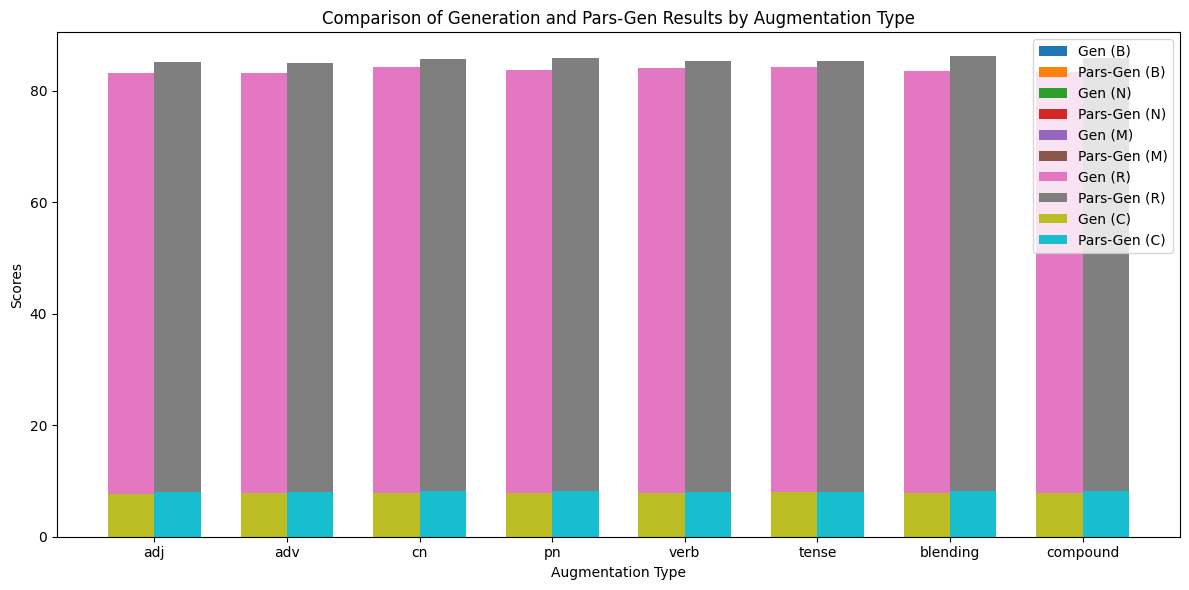

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
augmentation_types = ['adj', 'adv', 'cn', 'pn', 'verb', 'tense', 'blending', 'compound']

# Scores for the gen-pars task
gen_scores_B = [63.77, 64.09, 65.46, 64.30, 64.80, 65.09, 64.78, 64.67]
gen_scores_N = [9.24, 9.24, 9.46, 9.26, 9.32, 9.34, 9.39, 9.34]
gen_scores_M = [50.54, 51.31, 51.39, 51.07, 51.38, 52.04, 51.60, 50.97]
gen_scores_R = [82.24, 82.25, 83.22, 82.72, 83.08, 83.25, 82.62, 82.29]
gen_scores_C = [6.34, 6.42, 6.53, 6.46, 6.46, 6.55, 6.41, 6.38]

# Scores for the parsing task
pars_gen_scores_B = [66.41, 65.92, 65.95, 68.82, 66.80, 67.54, 69.63, 68.81]
pars_gen_scores_N = [9.41, 9.28, 9.35, 9.64, 9.46, 9.51, 9.68, 9.62]
pars_gen_scores_M = [52.52, 52.69, 52.88, 53.38, 52.58, 52.54, 53.67, 53.31]
pars_gen_scores_R = [84.12, 83.92, 84.68, 84.81, 84.33, 84.39, 85.16, 84.84]
pars_gen_scores_C = [6.66, 6.68, 6.75, 6.76, 6.66, 6.71, 6.82, 6.78]

# Set up bar positions
bar_width = 0.35
index = np.arange(len(augmentation_types))

# Plotting
plt.figure(figsize=(12, 6))

# Bar plots for B scores
plt.bar(index, gen_scores_B, bar_width, label='Gen (B)')
plt.bar(index + bar_width, pars_gen_scores_B, bar_width, label='Pars-Gen (B)')

# Bar plots for N scores
plt.bar(index, np.array(gen_scores_N) + bar_width, bar_width, label='Gen (N)')
plt.bar(index + bar_width, np.array(pars_gen_scores_N) + bar_width, bar_width, label='Pars-Gen (N)')

# Bar plots for M scores
plt.bar(index, np.array(gen_scores_M) + 2 * bar_width, bar_width, label='Gen (M)')
plt.bar(index + bar_width, np.array(pars_gen_scores_M) + 2 * bar_width, bar_width, label='Pars-Gen (M)')

# Bar plots for R scores
plt.bar(index, np.array(gen_scores_R) + 3 * bar_width, bar_width, label='Gen (R)')
plt.bar(index + bar_width, np.array(pars_gen_scores_R) + 3 * bar_width, bar_width, label='Pars-Gen (R)')

# Bar plots for C scores
plt.bar(index, np.array(gen_scores_C) + 4 * bar_width, bar_width, label='Gen (C)')
plt.bar(index + bar_width, np.array(pars_gen_scores_C) + 4 * bar_width, bar_width, label='Pars-Gen (C)')

# Adding labels
plt.xlabel('Augmentation Type')
plt.ylabel('Scores')
plt.title('Comparison of Generation and Pars-Gen Results by Augmentation Type')
plt.xticks(index + bar_width / 2, augmentation_types)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
gen_scores_C

[6.34, 6.42, 6.53, 6.46, 6.46, 6.55, 6.41, 6.38]

In [ ]:
import pandas as pd

# Data
augmentation_types = ['adj', 'adv', 'cn', 'pn', 'verb', 'tense', 'blending', 'compound']

# Scores for the gen-pars task
gen_scores_B = [63.77, 64.09, 65.46, 64.30, 64.80, 65.09, 64.78, 64.67]
gen_scores_N = [9.24, 9.24, 9.46, 9.26, 9.32, 9.34, 9.39, 9.34]
gen_scores_M = [50.54, 51.31, 51.39, 51.07, 51.38, 52.04, 51.60, 50.97]
gen_scores_R = [82.24, 82.25, 83.22, 82.72, 83.08, 83.25, 82.62, 82.29]
gen_scores_C = [6.34, 6.42, 6.53, 6.46, 6.46, 6.55, 6.41, 6.38]

# Scores for the parsing task
pars_gen_scores_B = [66.41, 65.92, 65.95, 68.82, 66.80, 67.54, 69.63, 68.81]
pars_gen_scores_N = [9.41, 9.28, 9.35, 9.64, 9.46, 9.51, 9.68, 9.62]
pars_gen_scores_M = [52.52, 52.69, 52.88, 53.38, 52.58, 52.54, 53.67, 53.31]
pars_gen_scores_R = [84.12, 83.92, 84.68, 84.81, 84.33, 84.39, 85.16, 84.84]
pars_gen_scores_C = [6.66, 6.68, 6.75, 6.76, 6.66, 6.71, 6.82, 6.78]

# Create a dictionary to hold the data
data = {
    'Augmentation Type': augmentation_types,
    'Gen B': gen_scores_B,
    'Gen N': gen_scores_N,
    'Gen M': gen_scores_M,
    'Gen R': gen_scores_R,
    'Gen C': gen_scores_C,
    'Pars-Gen B': pars_gen_scores_B,
    'Pars-Gen N': pars_gen_scores_N,
    'Pars-Gen M': pars_gen_scores_M,
    'Pars-Gen R': pars_gen_scores_R,
    'Pars-Gen C': pars_gen_scores_C
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel
df.to_excel('scores.xlsx', index=False)


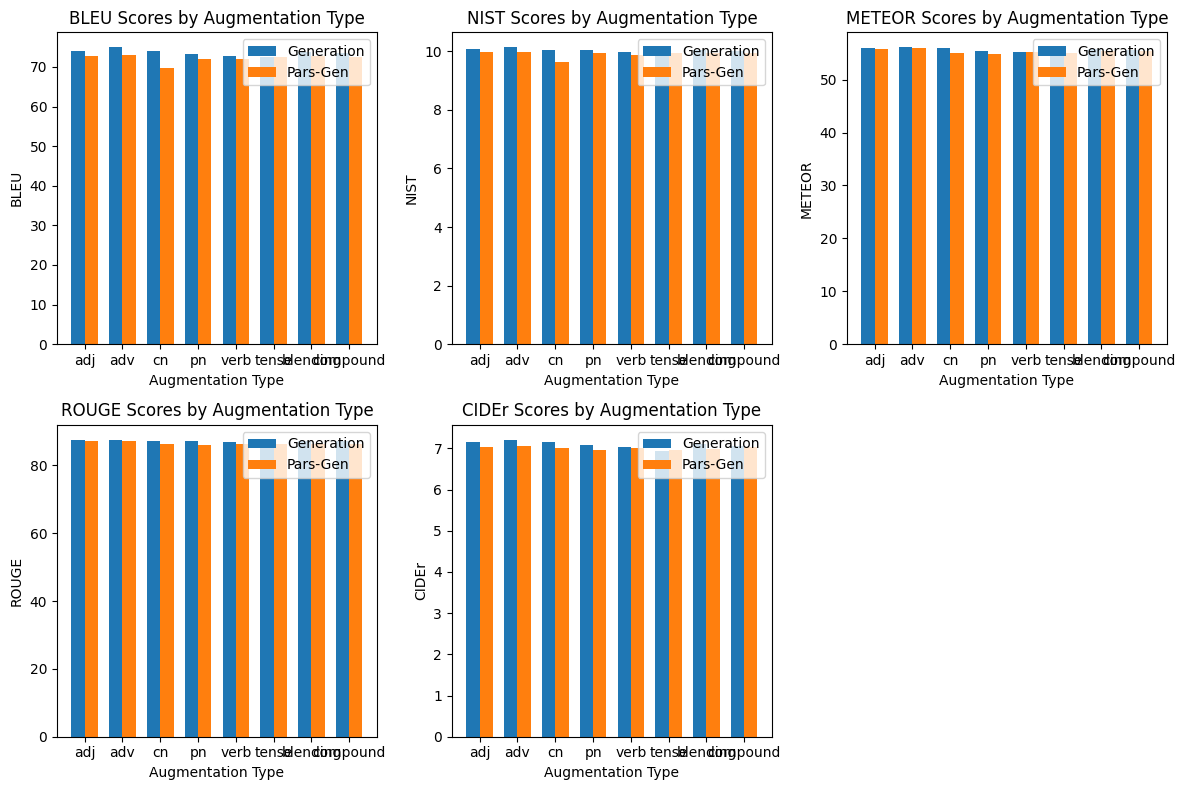

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
augmentation_types = ['adj', 'adv', 'cn', 'pn', 'verb', 'tense', 'blending', 'compound']

# Scores for generation task
gen_scores = {
    'adj': [74.12, 10.09, 55.99, 87.39, 7.16],
    'adv': [74.98, 10.14, 56.12, 87.61, 7.21],
    'cn': [73.92, 10.06, 55.95, 87.35, 7.16],
    'pn': [73.16, 10.05, 55.43, 87.18, 7.07],
    'verb': [72.73, 9.96, 55.29, 86.83, 7.04],
    'tense': [72.41, 9.92, 54.80, 86.01, 6.94],
    'blending': [73.89, 10.06, 55.75, 87.22, 7.10],
    'compound': [73.45, 10.02, 55.61, 87.29, 7.05]
}

# Scores for parsing to generation task
pars_gen_scores = {
    'adj': [72.82, 9.96, 55.83, 87.08, 7.04],
    'adv': [73.07, 9.96, 55.90, 87.09, 7.06],
    'cn': [69.71, 9.64, 55.02, 86.48, 7.01],
    'pn': [71.92, 9.94, 54.92, 86.17, 6.95],
    'verb': [72.08, 9.86, 55.28, 86.23, 7.00],
    'tense': [72.56, 9.94, 55.07, 86.24, 6.95],
    'blending': [72.77, 9.95, 55.39, 86.43, 6.99],
    'compound': [72.62, 9.95, 55.39, 86.40, 7.03]
}

# Set up bar positions
bar_width = 0.35
index = np.arange(len(augmentation_types))

# Plotting
plt.figure(figsize=(12, 8))
for i, score_type in enumerate(['BLEU', 'NIST', 'METEOR', 'ROUGE', 'CIDEr']):
    plt.subplot(2, 3, i+1)
    plt.bar(index, [gen_scores[aug_type][i] for aug_type in augmentation_types], bar_width, label='Generation')
    plt.bar(index + bar_width, [pars_gen_scores[aug_type][i] for aug_type in augmentation_types], bar_width, label='Pars-Gen')
    plt.xlabel('Augmentation Type')
    plt.ylabel(score_type)
    plt.title(f'{score_type} Scores by Augmentation Type')
    plt.xticks(index + bar_width / 2, augmentation_types)
    plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Gold Example data
semantic_parsing_f1_scores = [0.8174, 0.8588, 0.8721, 0.8791, 0.8652, 0.8884, 0.8912, 0.9001]  # F1-scores from semantic parsing

BLEU_evaluation_scores = [0.6641, 0.6592, 0.6595, 0.6882, 0.6680, 0.6754, 0.6963, 0.6881]  # Evaluation scores (e.g., BLEU, METEOR, COMET, chrF, BERT_Score)
meteor_evaluation_scores = [0.5252, 0.5269, 0.5288, 0.5338, 0.5258, 0.5254, 0.5367, 0.5331]
comet_evaluation_score = [0.9373, 0.9359, 0.9390, 0.9443, 0.9394, 0.9405, 0.9435, 0.9417]
chrf_evaluation_score = [0.8183, 0.8196, 0.8233, 0.8289, 0.8203, 0.8216, 0.8297, 0.8264]

# Compute Pearson correlation coefficient and p-value
b_correlation_coefficient, b_p_value = pearsonr(semantic_parsing_f1_scores, BLEU_evaluation_scores)

m_correlation_coefficient, m_p_value = pearsonr(semantic_parsing_f1_scores, meteor_evaluation_scores)

c_correlation_coefficient, c_p_value = pearsonr(semantic_parsing_f1_scores, comet_evaluation_score)

chr_correlation_coefficient, chr_p_value = pearsonr(semantic_parsing_f1_scores, chrf_evaluation_score)


# Print results

print("##############################################################")

print("BLEU Pearson correlation coefficient:", b_correlation_coefficient)
print("P-value:", b_p_value)

print("##############################################################")

print("METEOR Pearson correlation coefficient:", m_correlation_coefficient)
print("P-value:", m_p_value)

print("##############################################################")

print("COMET Pearson correlation coefficient:", c_correlation_coefficient)
print("P-value:", c_p_value)

print("##############################################################")

print("chrF Pearson correlation coefficient:", chr_correlation_coefficient)
print("P-value:", chr_p_value)

print("##############################################################")


##############################################################
BLEU Pearson correlation coefficient: 0.6613109518726505
P-value: 0.07412692773625262
##############################################################
METEOR Pearson correlation coefficient: 0.6148997437655034
P-value: 0.10471629369376256
##############################################################
COMET Pearson correlation coefficient: 0.6850858776879083
P-value: 0.06079684487694351
##############################################################
chrF Pearson correlation coefficient: 0.7185012640593489
P-value: 0.044655289400360586
##############################################################


**co-relation for human judgement**

In [ ]:
from scipy import stats

# Example data
semantic_parsing_f1_scores = [0.85, 0.76, 0.92, 0.81, 0.78]  # F1-scores from semantic parsing
evaluation_scores_binary = [1, 0, 1, 1, 0]  # Binary variable indicating presence (1) or absence (0) of a certain feature in evaluation scores

# Compute biserial correlation coefficient and p-value
result = stats.pointbiserialr(semantic_parsing_f1_scores, evaluation_scores_binary)

# Print results
print("Biserial correlation coefficient:", result)
# print("P-value:", p_value)


Biserial correlation coefficient: SignificanceResult(statistic=0.7765163665331186, pvalue=0.12248407234180389)


In [ ]:
from scipy import stats
a = [0, 0, 0, 1, 1]
b = [0.85, 0.76, 0.92, 0.81, 0.78]
stats.pointbiserialr(a, b)
# (0.8660254037844386, 0.011724811003954652)
stats.pearsonr(a, b)
# (0.86602540378443871, 0.011724811003954626)
# stats.corrcoef(a, b)
# array([[ 1.       ,  0.8660254],
      #  [ 0.8660254,  1.       ]])

PearsonRResult(statistic=-0.41701804869371156, pvalue=0.4848543115859332)

**applying custom threshold to continuous automactic evaluation values for comparison with ROSE.**

In [ ]:
def apply_threshold(input_file, output_file, threshold=0.5):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            try:
                value = float(line.strip())
                binary_value = 1 if value > threshold else 0
                outfile.write(f"{binary_value}\n")
            except ValueError:
                print(f"Warning: Skipping invalid value: {line.strip()}")

def main():
    input_file = 'non_binary_data.txt'
    output_file = 'binary_data.txt'
    threshold = 0.9

    apply_threshold(input_file, output_file, threshold)
    print(f"Conversion complete. Binary data saved to {output_file}")

if __name__ == "__main__":
    main()

Conversion complete. Binary data saved to binary_data.txt


In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import pearsonr

# Read binary values from a text file
with open('pars.txt', 'r') as file:
    a = [float(line.strip()) for line in file]

# Read continuous values from a text file
with open('gen.txt', 'r') as file:
    b = [float(line.strip()) for line in file]

# Compute point-biserial correlation
# correlation, p_value = stats.pointbiserialr(a, b)
correlation, p_value = stats.pearsonr(a, b)

# Output the results
print(f"Point-biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

Point-biserial Correlation: 0.29870580098729954
P-value: 5.256477996547399e-20


**computing co-relation **

In [ ]:
import numpy as np

# Path to the first input file
file1_path = "rose.txt"

# Path to the second input file
file2_path = "auto.txt"

# Read data from the first file
with open(file1_path, "r") as file1:
    data1 = [float(line.strip()) for line in file1]

# Read data from the second file
with open(file2_path, "r") as file2:
    data2 = [float(line.strip()) for line in file2]

# Calculate Pearson correlation coefficient
correlation_coefficient = np.corrcoef(data1, data2)[0, 1]

print("Pearson correlation coefficient:", correlation_coefficient)


Pearson correlation coefficient: 0.42393423998430924


**calculating spearman co-relation**

In [ ]:
import numpy as np
from scipy import stats

def read_data(file_path):
    with open(file_path, 'r') as f:
        return [float(line.strip()) for line in f]

def compute_spearman_correlation(auto_measures, human_evaluations):
    correlation, p_value = stats.spearmanr(auto_measures, human_evaluations)
    return correlation, p_value

def main():
    # File paths
    auto_measures_file = 'automatic_measures.txt'
    human_evaluations_file = 'human_evaluations.txt'

    # Read data from files
    auto_measures = read_data(auto_measures_file)
    human_evaluations = read_data(human_evaluations_file)

    # Ensure both lists have the same length
    if len(auto_measures) != len(human_evaluations):
        raise ValueError("The number of automatic measures and human evaluations must be the same.")

    # Compute Spearman correlation
    correlation, p_value = compute_spearman_correlation(auto_measures, human_evaluations)

    # Print results
    print(f"Spearman correlation coefficient: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")

if __name__ == "__main__":
    main()

Spearman correlation coefficient: 0.2508
P-value: 0.0000


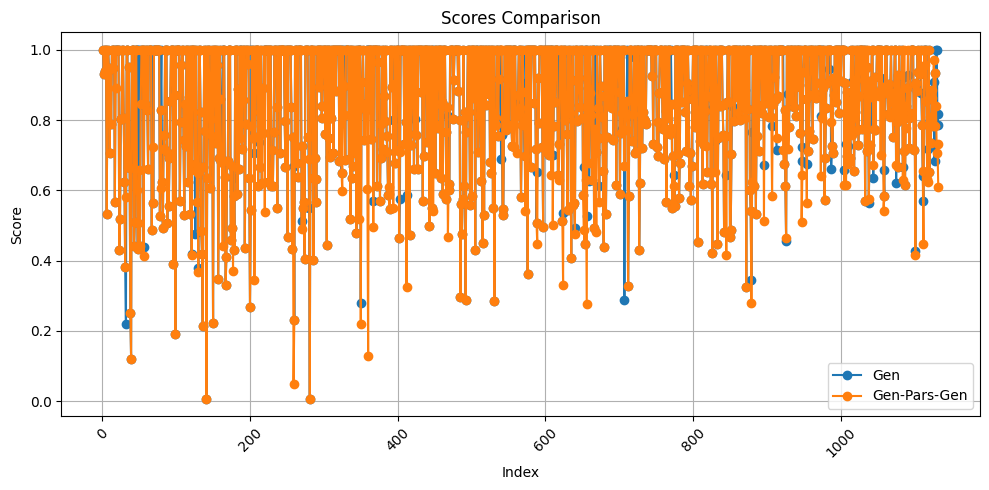

In [ ]:
import matplotlib.pyplot as plt

# Function to read data from a text file
def read_scores(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        scores = [float(line.strip()) for line in lines]
        return scores

# Paths to the text files
gen_file_path = 'gen.txt'  # Update this with the actual file path
gen_pars_gen_file_path = 'gen-pipe.txt'  # Update this with the actual file path

# Read scores from the files
gen_scores = read_scores(gen_file_path)
gen_pars_gen_scores = read_scores(gen_pars_gen_file_path)

# Ensure both score lists have the same length
min_length = min(len(gen_scores), len(gen_pars_gen_scores))
gen_scores = gen_scores[:min_length]
gen_pars_gen_scores = gen_pars_gen_scores[:min_length]

# Generate indices for the x-axis
indices = list(range(1, min_length + 1))

# Plotting the line chart
plt.figure(figsize=(10, 5))
plt.plot(indices, gen_scores, label='Gen', marker='o')
plt.plot(indices, gen_pars_gen_scores, label='Gen-Pars-Gen', marker='o')
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Scores Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


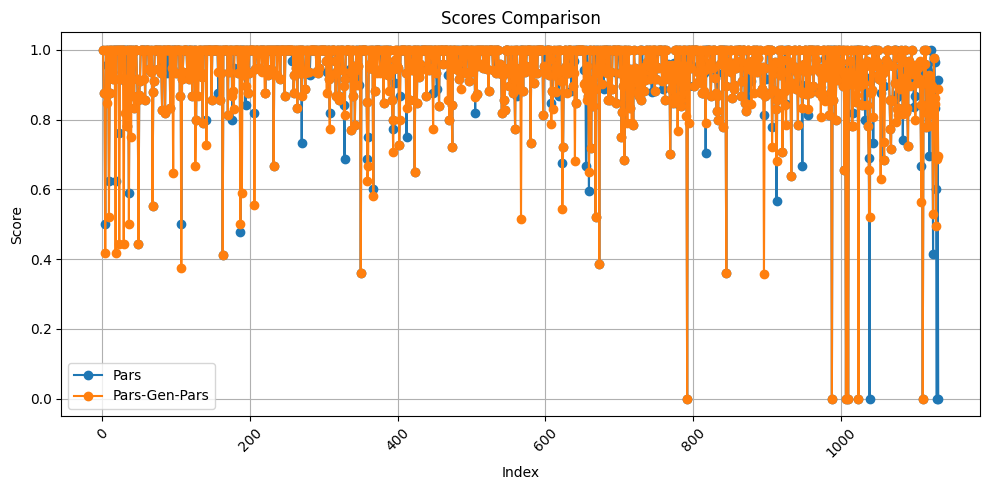

In [ ]:
import matplotlib.pyplot as plt

# Function to read data from a text file
def read_scores(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        scores = [float(line.strip()) for line in lines]
        return scores

# Paths to the text files
gen_file_path = 'gen.txt'  # Update this with the actual file path
gen_pars_gen_file_path = 'gen-pars-gen.txt'  # Update this with the actual file path

# Read scores from the files
gen_scores = read_scores(gen_file_path)
gen_pars_gen_scores = read_scores(gen_pars_gen_file_path)

# Ensure both score lists have the same length
min_length = min(len(gen_scores), len(gen_pars_gen_scores))
gen_scores = gen_scores[:min_length]
gen_pars_gen_scores = gen_pars_gen_scores[:min_length]

# Generate indices for the x-axis
indices = list(range(1, min_length + 1))

# Plotting the line chart
plt.figure(figsize=(10, 5))
plt.plot(indices, gen_scores, label='Pars', marker='o')
plt.plot(indices, gen_pars_gen_scores, label='Pars-Gen-Pars', marker='o')
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('Scores Comparison')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as PDF
plt.savefig('pars-and-pars_gen_pars.pdf')

# Show the plot
plt.show()


**Distribution of number of examples with respect to sentence length**

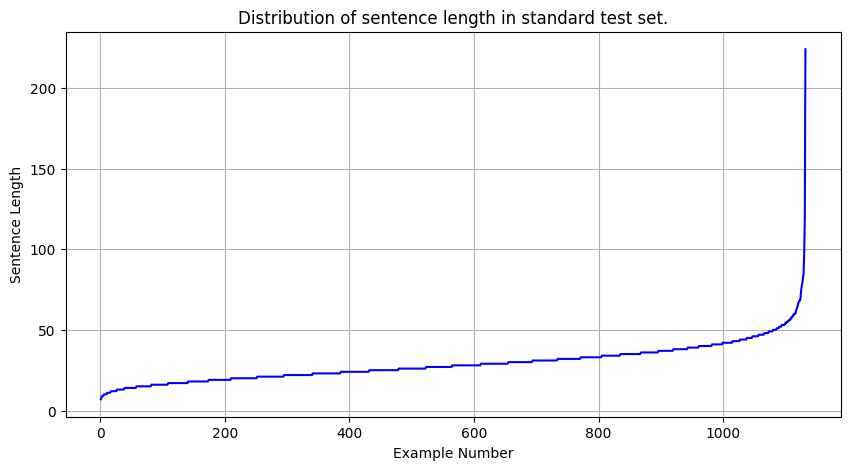

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Function to read file and calculate sentence lengths
def get_sentence_lengths(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    sentence_lengths = [len(line.strip()) for line in lines]
    return sentence_lengths

# Function to plot the lengths of sentences
def plot_sentence_lengths(sentence_lengths):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(sentence_lengths) + 1), sentence_lengths,  linestyle='-', color='b')
    plt.title('Distribution of sentence length in standard test set.')
    plt.xlabel('Example Number')
    plt.ylabel('Sentence Length')
    plt.grid(True)
    plt.show()
    plt.savefig('sentence_length.pdf')

# Main function to execute the process
def main():
    filename = 'test.txt'  # Replace with your text file name
    sentence_lengths = get_sentence_lengths(filename)
    plot_sentence_lengths(sentence_lengths)

if __name__ == '__main__':
    main()


**Gen score with respect to number of examples**

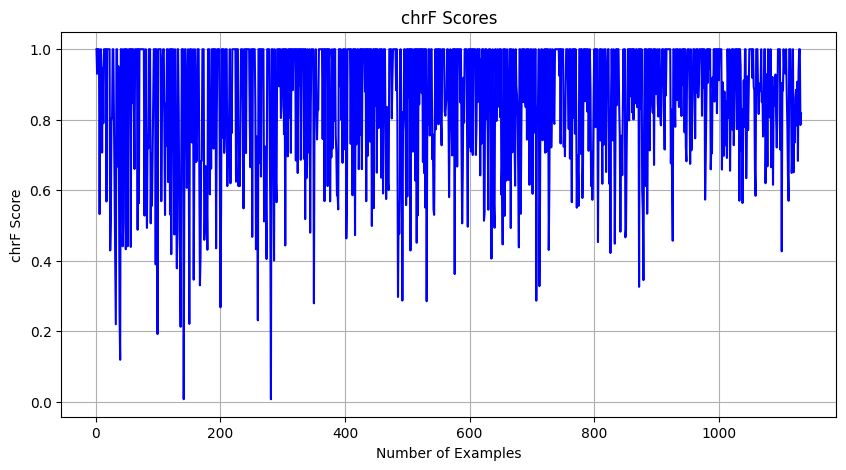

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Function to read chrF scores from a file
def get_chrf_scores(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    chrf_scores = [float(line.strip()) for line in lines]
    return chrf_scores

# Function to plot chrF scores
def plot_chrf_scores(chrf_scores):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(chrf_scores) + 1), chrf_scores,  linestyle='-', color='g')
    plt.title('chrF Scores')
    plt.xlabel('Number of Examples')
    plt.ylabel('chrF Score')
    plt.grid(True)
    plt.show()

# Main function to execute the process
def main():
    filename = 'gen.txt'  # Replace with your text file name
    chrf_scores = get_chrf_scores(filename)
    plot_chrf_scores(chrf_scores)

if __name__ == '__main__':
    main()


applying average smoothing to chrF score for gen.

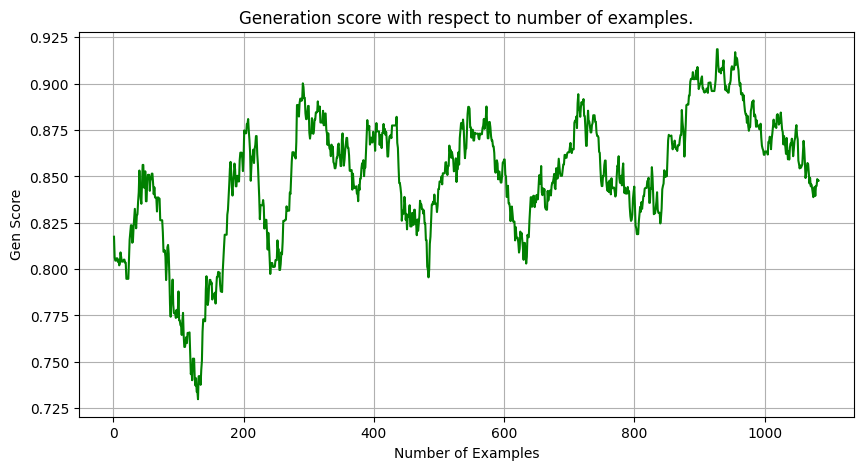

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read chrF scores from a file
def get_chrf_scores(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    chrf_scores = [float(line.strip()) for line in lines]
    return chrf_scores

# Function to apply moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Function to plot chrF scores with smoothing
def plot_chrf_scores(chrf_scores, window_size=50):
    smoothed_scores = moving_average(chrf_scores, window_size)
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(smoothed_scores) + 1), smoothed_scores,  linestyle='-', color='g')
    plt.title('Generation score with respect to number of examples.')
    plt.xlabel('Number of Examples')
    plt.ylabel('Gen Score')
    plt.grid(True)
    plt.show()
    plt.savefig('gen_score.pdf')

# Main function to execute the process
def main():
    filename = 'gen.txt'  # Replace with your text file name
    chrf_scores = get_chrf_scores(filename)
    plot_chrf_scores(chrf_scores)

if __name__ == '__main__':
    main()


ploting gen and gen-pars-gen scores with average smooting.

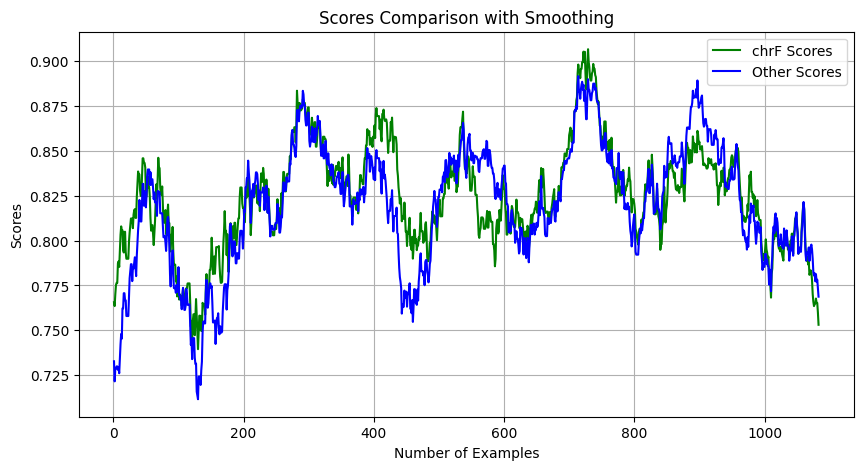

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read scores from a file
def get_scores(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    scores = [float(line.strip()) for line in lines]
    return scores

# Function to apply moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Function to plot scores
def plot_scores(chrf_scores, other_scores, window_size=50):
    smoothed_chrf_scores = moving_average(chrf_scores, window_size)
    smoothed_other_scores = moving_average(other_scores, window_size)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(smoothed_chrf_scores) + 1), smoothed_chrf_scores, linestyle='-', color='g', label='chrF Scores')
    plt.plot(range(1, len(smoothed_other_scores) + 1), smoothed_other_scores, linestyle='-', color='b', label='Other Scores')

    plt.title('Scores Comparison with Smoothing')
    plt.xlabel('Number of Examples')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to execute the process
def main():
    chrf_filename = 'gen.txt'  # Replace with your chrF scores file name
    other_filename = 'gen_pars_gen.txt'  # Replace with your other scores file name

    chrf_scores = get_scores(chrf_filename)
    other_scores = get_scores(other_filename)

    # Ensure both files have the same number of examples
    assert len(chrf_scores) == len(other_scores), "Both files must have the same number of examples."

    plot_scores(chrf_scores, other_scores)

if __name__ == '__main__':
    main()


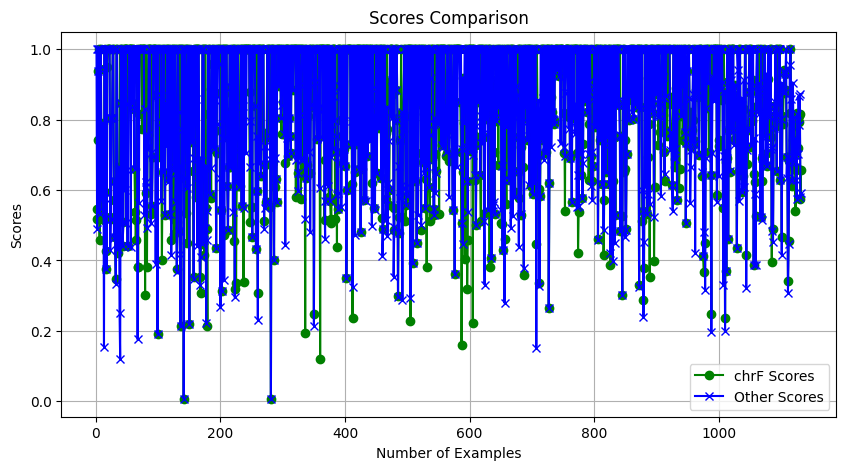

In [ ]:
import matplotlib.pyplot as plt

# Function to read scores from a file
def get_scores(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    scores = [float(line.strip()) for line in lines]
    return scores

# Function to plot scores
def plot_scores(chrf_scores, other_scores):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(chrf_scores) + 1), chrf_scores, marker='o', linestyle='-', color='g', label='chrF Scores')
    plt.plot(range(1, len(other_scores) + 1), other_scores, marker='x', linestyle='-', color='b', label='Other Scores')

    plt.title('Scores Comparison')
    plt.xlabel('Number of Examples')
    plt.ylabel('Scores')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to execute the process
def main():
    chrf_filename = 'gen.txt'  # Replace with your chrF scores file name
    other_filename = 'gen_pars_gen.txt'  # Replace with your other scores file name

    chrf_scores = get_scores(chrf_filename)
    other_scores = get_scores(other_filename)

    # Ensure both files have the same number of examples
    assert len(chrf_scores) == len(other_scores), "Both files must have the same number of examples."

    plot_scores(chrf_scores, other_scores)

if __name__ == '__main__':
    main()


combining plots

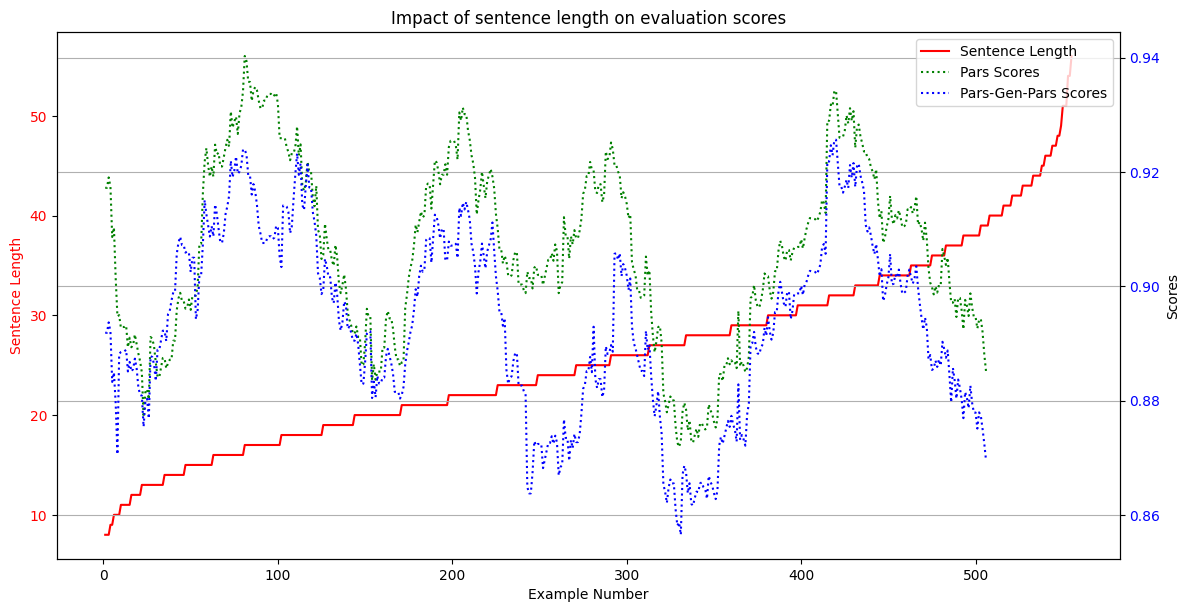

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read scores from a file
def get_scores(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    scores = [float(line.strip()) for line in lines]
    return scores

# Function to read sentence lengths from a file
def get_sentence_lengths(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    sentence_lengths = [len(line.strip()) for line in lines]
    return sentence_lengths

# Function to apply moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Function to plot scores and sentence lengths
def plot_all(sentence_lengths, chrf_scores, other_scores, window_size=50):
    smoothed_chrf_scores = moving_average(chrf_scores, window_size)
    smoothed_other_scores = moving_average(other_scores, window_size)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting sentence lengths on primary y-axis
    ax1.set_xlabel('Example Number')
    ax1.set_ylabel('Sentence Length', color='r')
    ax1.plot(range(1, len(sentence_lengths) + 1), sentence_lengths, linestyle='-', color='r', label='Sentence Length')
    ax1.tick_params(axis='y', labelcolor='r')

    # Creating a secondary y-axis for chrF scores
    ax2 = ax1.twinx()
    ax2.set_ylabel('Scores', color='black')
    ax2.plot(range(1, len(smoothed_chrf_scores) + 1), smoothed_chrf_scores, linestyle='dotted', color='g', label='Pars Scores')
    ax2.plot(range(1, len(smoothed_other_scores) + 1), smoothed_other_scores, linestyle='dotted', color='b', label='Pars-Gen-Pars Scores')
    ax2.tick_params(axis='y', labelcolor='b')

    fig.tight_layout()
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    plt.title('Impact of sentence length on evaluation scores')
    plt.grid(True)
    plt.savefig('parsing_IT_comparison.pdf' , bbox_inches='tight')
    plt.show()

# Main function to execute the process
def main():
    sentence_length_filename = 'test.txt'  # Replace with your sentence lengths file name
    chrf_filename = 'wo-pipe.txt'  # Replace with your chrF scores file name
    other_filename = 'with-pipe.txt'  # Replace with your other scores file name

    sentence_lengths = get_sentence_lengths(sentence_length_filename)
    chrf_scores = get_scores(chrf_filename)
    other_scores = get_scores(other_filename)

    # Ensure all files have the same number of examples
    assert len(sentence_lengths) == len(chrf_scores) == len(other_scores), "All files must have the same number of examples."

    plot_all(sentence_lengths, chrf_scores, other_scores)

if __name__ == '__main__':
    main()


after applying moving average normalization on all the data values in the plot

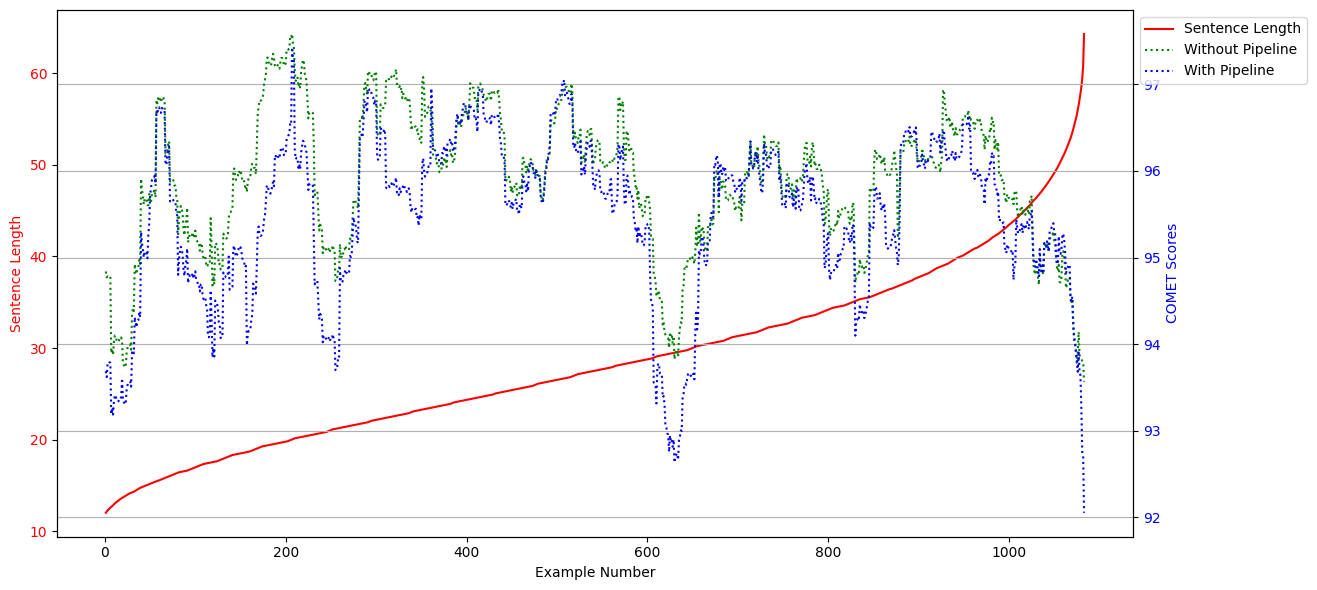

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read scores from a file
def get_scores(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    # scores = [float(line.strip()) for line in lines]
    scores = [float(line.strip()) * 100 for line in lines]
    return scores

# Function to read sentence lengths from a file
def get_sentence_lengths(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    sentence_lengths = [len(line.strip()) for line in lines]
    return sentence_lengths

# Function to apply moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Function to plot scores and sentence lengths
def plot_all(sentence_lengths, chrf_scores, other_scores, window_size=50, output_filename='gen_comet_EN.pdf'):
    smoothed_sentence_lengths = moving_average(sentence_lengths, window_size)
    smoothed_chrf_scores = moving_average(chrf_scores, window_size)
    smoothed_other_scores = moving_average(other_scores, window_size)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting sentence lengths on primary y-axis
    ax1.set_xlabel('Example Number')
    ax1.set_ylabel('Sentence Length', color='r')
    ax1.plot(range(1, len(smoothed_sentence_lengths) + 1), smoothed_sentence_lengths, linestyle='-', color='r', label='Sentence Length')
    ax1.tick_params(axis='y', labelcolor='r')

    # Creating a secondary y-axis for chrF scores
    ax2 = ax1.twinx()
    ax2.set_ylabel('COMET Scores', color='b')
    ax2.plot(range(1, len(smoothed_chrf_scores) + 1), smoothed_chrf_scores, linestyle='dotted', color='g', label='Without Pipeline')
    ax2.plot(range(1, len(smoothed_other_scores) + 1), smoothed_other_scores, linestyle='dotted', color='b', label='With Pipeline')
    ax2.tick_params(axis='y', labelcolor='b')

    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    # plt.title('Sentence Lengths and Scores Comparison')
    plt.grid(True)

    # Save the plot as a PDF
    plt.savefig(output_filename, bbox_inches='tight')
    plt.show()

# Main function to execute the process
def main():
    sentence_length_filename = 'test-text.txt'  # Replace with your sentence lengths file name
    chrf_filename = 'wo-pipe.txt'  # Replace with your chrF scores file name
    other_filename = 'with-pipe.txt'  # Replace with your other scores file name

    sentence_lengths = get_sentence_lengths(sentence_length_filename)
    chrf_scores = get_scores(chrf_filename)
    other_scores = get_scores(other_filename)

    # Ensure all files have the same number of examples
    assert len(sentence_lengths) == len(chrf_scores) == len(other_scores), "All files must have the same number of examples."

    plot_all(sentence_lengths, chrf_scores, other_scores)

if __name__ == '__main__':
    main()


**reading parsing result line-by-line and cleaning the result:**

In [ ]:
# Input data
data = [
    "0:0.7027027027027027",
    "1:1.0",
    "2:0.8648648648648649",
    "3:0.75",
    "generated sbn 4 error: Strict evaluation mode, possibly ill-formed graph not exported.",
    "5:0.7567567567567567",
    "6:1.0",
    "7:0.7222222222222222"
]

# Function to clean the data
def clean_data(data):
    cleaned_data = []

    for line in data:
        # Split the line by colon
        parts = line.split(":")

        if len(parts) == 2:  # Check if we have a valid split
            value = parts[1].strip()  # Get the value after colon and remove any extra spaces

            try:
                # Try to convert the value to a float
                float(value)
                cleaned_data.append(value)  # If successful, append the value
            except ValueError:
                # If conversion fails, it's not a number, so append "0.00"
                cleaned_data.append("0.00")
        else:
            # If there's no colon or incorrect format, append "0.00"
            cleaned_data.append("0.00")

    return cleaned_data

# Clean the input data
cleaned_data = clean_data(data)

# Output the cleaned data
for item in cleaned_data:
    print(item)


0.7027027027027027
1.0
0.8648648648648649
0.75
0.00
0.7567567567567567
1.0
0.7222222222222222


In [ ]:
# Define file paths
input_file_path = 'pars.txt'
output_file_path = 'cleaned_pars.txt'

# Function to clean the data
def clean_data(data):
    cleaned_data = []

    for line in data:
        # Split the line by colon
        parts = line.split(":")

        if len(parts) == 2:  # Check if we have a valid split
            value = parts[1].strip()  # Get the value after colon and remove any extra spaces

            try:
                # Try to convert the value to a float
                float(value)
                cleaned_data.append(value)  # If successful, append the value
            except ValueError:
                # If conversion fails, it's not a number, so append "0.00"
                cleaned_data.append("0.00")
        else:
            # If there's no colon or incorrect format, append "0.00"
            cleaned_data.append("0.00")

    return cleaned_data

# Read the data from the input file
with open(input_file_path, 'r') as file:
    data = file.readlines()

# Clean the data
cleaned_data = clean_data(data)

# Write the cleaned data to the output file
with open(output_file_path, 'w') as file:
    for item in cleaned_data:
        file.write(item + '\n')

print(f"Cleaned data has been written to {output_file_path}")


Cleaned data has been written to cleaned_pars.txt


**code to filter comet-scores line-by-line**

In [ ]:
import re

# Function to extract scores and write to a new file
def extract_and_write_scores(input_file, output_file):
    scores = []

    # Open the input file to read
    with open(input_file, 'r') as file:
        for line in file:
            # Use regex to find the score after "score:"
            match = re.search(r'score: ([\d.]+)', line)
            if match:
                scores.append(match.group(1))

    # Write the extracted scores to the output file
    with open(output_file, 'w') as file:
        for score in scores:
            file.write(f'{score}\n')

# Paths to your files
input_file = 'comet.txt'
output_file = 'comet-cleaned.txt'

# Call the function to extract scores and write to a new file
extract_and_write_scores(input_file, output_file)

print(f'Scores have been written to {output_file}')


Scores have been written to comet-cleaned.txt


**sentence classification based on length**

In [ ]:
import nltk
from collections import defaultdict

# Download the punkt tokenizer if not already available
nltk.download('punkt', quiet=True)

def classify_sentences(file_path):
    # Initialize dictionaries to store sentences by category
    categories = defaultdict(list)
    sentence_types = []

    # Read the file and process each line
    with open(file_path, 'r', encoding='utf-8') as file:
        for index, line in enumerate(file, start=1):
            sentence = line.strip()
            if sentence:
                # Tokenize the sentence
                tokens = nltk.word_tokenize(sentence)
                token_count = len(tokens)

                # Classify the sentence based on token count
                if 0 <= token_count <= 4:
                    category = 'short'
                elif 4 < token_count <= 8:
                    category = 'medium'
                else:
                    category = 'long'

                categories[category].append((index, sentence))
                sentence_types.append(category)

    return categories, sentence_types

# Example usage
# file_path = 'test.txt'
file_path = 'test.txt'
classified_sentences, sentence_types = classify_sentences(file_path)

# Print results and save to file
with open('classified_sentences.txt', 'w', encoding='utf-8') as output_file:
    total_sentences = sum(len(sentences) for sentences in classified_sentences.values())

    for category, sentences in classified_sentences.items():
        count = len(sentences)
        frequency = count / total_sentences
        print(f"{category.capitalize()} sentences: {count} (Frequency: {frequency:.2%})")
        output_file.write(f"{category.capitalize()} sentences: {count} (Frequency: {frequency:.2%})\n")

        for index, sentence in sentences:
            output_line = f"{index}\t{sentence}\n"
            output_file.write(output_line)

        print(f"Saved {count} {category} sentences to the file.")
        print()
        output_file.write('\n')

print("Classification complete. Results saved to 'classified_sentences.txt'")

# Save sentence types in sequence
with open('sentence_types_sequence.txt', 'w', encoding='utf-8') as type_file:
    for sentence_type in sentence_types:
        type_file.write(f"{sentence_type}\n")

print("Sentence types sequence saved to 'sentence_types_sequence.txt'")

Short sentences: 143 (Frequency: 25.77%)
Saved 143 short sentences to the file.

Medium sentences: 390 (Frequency: 70.27%)
Saved 390 medium sentences to the file.

Long sentences: 22 (Frequency: 3.96%)
Saved 22 long sentences to the file.

Classification complete. Results saved to 'classified_sentences.txt'
Sentence types sequence saved to 'sentence_types_sequence.txt'


pre-processing text (if needed)

In [ ]:
import nltk
import re
from collections import defaultdict

# Download the punkt tokenizer if not already available
nltk.download('punkt', quiet=True)

def preprocess_text(text):
    # Convert contractions
    text = re.sub(r"'m", " am", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ll", " will", text)

    # Remove hyphens between words
    text = re.sub(r"(\w+)-(\w+)", r"\1 \2", text)

    # Remove other punctuation
    text = re.sub(r"[^\w\s]", " ", text)

    return text

def count_tokens(sentence):
    cleaned_sentence = preprocess_text(sentence)
    tokens = nltk.word_tokenize(cleaned_sentence.lower())
    return len(tokens)

def classify_sentences(file_path):
    categories = defaultdict(list)
    sentence_types = []

    with open(file_path, 'r', encoding='utf-8') as file:
        for index, line in enumerate(file, start=1):
            sentence = line.strip()
            if sentence:
                token_count = count_tokens(sentence)

                if 0 <= token_count <= 4:
                    category = 'short'
                elif 4 < token_count <= 8:
                    category = 'medium'
                else:
                    category = 'long'

                categories[category].append((index, sentence))
                sentence_types.append(category)

    return categories, sentence_types

# Example usage
file_path = 'test.txt'
classified_sentences, sentence_types = classify_sentences(file_path)

# Print results and save to file
with open('classified_sentences.txt', 'w', encoding='utf-8') as output_file:
    total_sentences = sum(len(sentences) for sentences in classified_sentences.values())

    for category, sentences in classified_sentences.items():
        count = len(sentences)
        frequency = count / total_sentences
        print(f"{category.capitalize()} sentences: {count} (Frequency: {frequency:.2%})")
        output_file.write(f"{category.capitalize()} sentences: {count} (Frequency: {frequency:.2%})\n")

        for index, sentence in sentences:
            output_line = f"{index}\t{sentence}\n"
            output_file.write(output_line)

        print(f"Saved {count} {category} sentences to the file.")
        print()
        output_file.write('\n')

print("Classification complete. Results saved to 'classified_sentences.txt'")

# Save sentence types in sequence
with open('sentence_types_sequence.txt', 'w', encoding='utf-8') as type_file:
    for sentence_type in sentence_types:
        type_file.write(f"{sentence_type}\n")

print("Sentence types sequence saved to 'sentence_types_sequence.txt'")

Short sentences: 385 (Frequency: 34.01%)
Saved 385 short sentences to the file.

Medium sentences: 657 (Frequency: 58.04%)
Saved 657 medium sentences to the file.

Long sentences: 90 (Frequency: 7.95%)
Saved 90 long sentences to the file.

Classification complete. Results saved to 'classified_sentences.txt'
Sentence types sequence saved to 'sentence_types_sequence.txt'


# **For English**

**1. sentence classification based on the structural complexity**

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from collections import Counter

def classify_sentence(doc):
    # Check for compound sentences (presence of coordinating conjunctions)
    has_coord_conj = any(token.dep_ == "cc" for token in doc)

    # Check for complex sentences (presence of subordinating clauses)
    has_subord_clause = any(token.dep_ in ["advcl", "acl", "relcl"] for token in doc)

    if has_coord_conj and has_subord_clause:
        return "compound-complex"
    elif has_coord_conj:
        return "compound"
    elif has_subord_clause:
        return "complex"
    else:
        return "simple"

def main():
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Read input file
    with open("test.txt", "r") as f:
        sentences = f.readlines()

    # Process and classify sentences
    classifications = []
    for sentence in sentences:
        doc = nlp(sentence.strip())
        classification = classify_sentence(doc)
        classifications.append(classification)

    # Write classifications to output file
    with open("labels.txt", "w") as f:
        for classification in classifications:
            f.write(f"{classification}\n")

    # Count and calculate percentages
    total = len(classifications)
    counter = Counter(classifications)

    print("Classification results:")
    for category in ["simple", "compound", "complex", "compound-complex"]:
        count = counter[category]
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    main()

Classification results:
simple: 8118 (93.31%)
compound: 356 (4.09%)
complex: 217 (2.49%)
compound-complex: 9 (0.10%)


**2. sentence classification based on sentece type (based on purpose)**

In [ ]:
import spacy
from collections import Counter

def classify_sentence_type(doc):
    # Get the first and last tokens of the sentence
    first_token = doc[0]
    last_token = doc[-1]

    # Check for interrogative sentences
    if last_token.text in ["?", "？"]:
        return "interrogative"

    # Check for exclamatory sentences
    if last_token.text in ["!", "！"]:
        return "exclamatory"

    # Check for imperative sentences
    if first_token.pos_ == "VERB" and first_token.tag_ in ["VB", "VBP"]:
        return "imperative"

    # If none of the above, classify as declarative
    return "declarative"

def main():
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Read input file
    with open("test.txt", "r") as f:
        sentences = f.readlines()

    # Process and classify sentences
    classifications = []
    for sentence in sentences:
        doc = nlp(sentence.strip())
        classification = classify_sentence_type(doc)
        classifications.append(classification)

    # Write classifications to output file
    with open("sentence_types.txt", "w") as f:
        for classification in classifications:
            f.write(f"{classification}\n")

    # Count and calculate percentages
    total = len(classifications)
    counter = Counter(classifications)

    print("Classification results:")
    for category in ["declarative", "exclamatory", "imperative", "interrogative"]:
        count = counter[category]
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    main()

Classification results:
declarative: 8162 (93.82%)
exclamatory: 62 (0.71%)
imperative: 66 (0.76%)
interrogative: 410 (4.71%)


**3. classification based on polarity**

In [ ]:
from textblob import TextBlob
from collections import Counter

def classify_sentence_polarity(sentence):
    blob = TextBlob(sentence)
    # If polarity is less than 0, classify as Negative, otherwise Affirmative
    return "Negative" if blob.sentiment.polarity < 0 else "Affirmative"

def main():
    # Read input file
    with open("test.txt", "r") as f:
        sentences = f.readlines()

    # Process and classify sentences
    classifications = []
    for sentence in sentences:
        classification = classify_sentence_polarity(sentence.strip())
        classifications.append(classification)

    # Write classifications to output file
    with open("sentence_polarities.txt", "w") as f:
        for classification in classifications:
            f.write(f"{classification}\n")

    # Count and calculate percentages
    total = len(classifications)
    counter = Counter(classifications)

    print("Classification results:")
    for category in ["Affirmative", "Negative"]:
        count = counter[category]
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    main()

Classification results:
Affirmative: 7664 (88.09%)
Negative: 1036 (11.91%)


**4. sentence classification based on active or passive voice**

In [ ]:
import spacy
from collections import Counter

def classify_sentence_voice(doc):
    # Check for passive voice indicators
    passive_indicators = [
        token for token in doc
        if token.dep_ == "auxpass" or (token.dep_ == "nsubjpass" and token.head.dep_ == "ROOT")
    ]

    # Classify as passive if indicators are found, otherwise active
    return "Passive" if passive_indicators else "Active"

def main():
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Read input file
    with open("test.txt", "r") as f:
        sentences = f.readlines()

    # Process and classify sentences
    classifications = []
    for sentence in sentences:
        doc = nlp(sentence.strip())
        classification = classify_sentence_voice(doc)
        classifications.append(classification)

    # Write classifications to output file
    with open("sentence_voices.txt", "w") as f:
        for classification in classifications:
            f.write(f"{classification}\n")

    # Count and calculate percentages
    total = len(classifications)
    counter = Counter(classifications)

    print("Classification results:")
    for category in ["Active", "Passive"]:
        count = counter[category]
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    main()

Classification results:
Active: 8005 (92.01%)
Passive: 695 (7.99%)


# **For Italian**

**1. based on Structural Complexity**

In [ ]:
!python -m spacy download it_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 65.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from collections import Counter

def classify_sentence(doc):
    # Check for compound sentences (presence of coordinating conjunctions)
    has_coord_conj = any(token.dep_ == "cc" for token in doc)

    # Check for complex sentences (presence of subordinating clauses)
    has_subord_clause = any(token.dep_ in ["acl", "advcl", "relcl"] for token in doc)

    if has_coord_conj and has_subord_clause:
        return "compound-complex"
    elif has_coord_conj:
        return "compound"
    elif has_subord_clause:
        return "complex"
    else:
        return "simple"

def main():
    # Load Italian spaCy model
    nlp = spacy.load("it_core_news_sm")

    # Read input file
    with open("gold_silver_text.txt", "r", encoding="utf-8") as f:
        sentences = f.readlines()

    # Process and classify sentences
    classifications = []
    for sentence in sentences:
        doc = nlp(sentence.strip())
        classification = classify_sentence(doc)
        classifications.append(classification)

    # Write classifications to output file
    with open("sentence_classifications_italian.txt", "w", encoding="utf-8") as f:
        for classification in classifications:
            f.write(f"{classification}\n")

    # Count and calculate percentages
    total = len(classifications)
    counter = Counter(classifications)

    print("Classification results:")
    for category in ["simple", "compound", "complex", "compound-complex"]:
        count = counter[category]
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    main()

Classification results:
simple: 4456 (88.05%)
compound: 235 (4.64%)
complex: 292 (5.77%)
compound-complex: 78 (1.54%)


**2. based on Sentence Type**

In [ ]:
import spacy
from collections import Counter

def classify_sentence_type(doc):
    # Get the first and last tokens of the sentence
    first_token = doc[0]
    last_token = doc[-1]

    # Check for interrogative sentences
    if last_token.text == "?":
        return "interrogative"

    # Check for exclamatory sentences
    if last_token.text == "!":
        return "exclamatory"

    # Check for imperative sentences (simplified check)
    if first_token.pos_ == "VERB" and first_token.morph.get("Mood") == ["Imp"]:
        return "imperative"

    # If none of the above, classify as declarative
    return "declarative"

def main():
    # Load Italian spaCy model
    nlp = spacy.load("it_core_news_sm")

    # Read input file
    with open("gold_silver_text.txt", "r", encoding="utf-8") as f:
        sentences = f.readlines()

    # Process and classify sentences
    classifications = []
    for sentence in sentences:
        doc = nlp(sentence.strip())
        classification = classify_sentence_type(doc)
        classifications.append(classification)

    # Write classifications to output file
    with open("sentence_types_italian.txt", "w", encoding="utf-8") as f:
        for classification in classifications:
            f.write(f"{classification}\n")

    # Count and calculate percentages
    total = len(classifications)
    counter = Counter(classifications)

    print("Classification results:")
    for category in ["declarative", "exclamatory", "imperative", "interrogative"]:
        count = counter[category]
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    main()

Classification results:
declarative: 4423 (87.39%)
exclamatory: 96 (1.90%)
imperative: 29 (0.57%)
interrogative: 513 (10.14%)


**3. based on Polarity**

In [ ]:
!pip install feel-it

In [ ]:
from feel_it import EmotionClassifier, SentimentClassifier
from collections import Counter

def classify_sentence_polarity(sentence):
    sentiment = sentiment_classifier.predict([sentence])[0]
    return "Affirmative" if sentiment == "positive" else "Negative"

def main():
    # Read input file
    with open("gold_silver_text.txt", "r", encoding="utf-8") as f:
        sentences = f.readlines()

    # Process and classify sentences
    classifications = []
    for sentence in sentences:
        classification = classify_sentence_polarity(sentence.strip())
        classifications.append(classification)

    # Write classifications to output file
    with open("sentence_polarities_italian.txt", "w", encoding="utf-8") as f:
        for classification in classifications:
            f.write(f"{classification}\n")

    # Count and calculate percentages
    total = len(classifications)
    counter = Counter(classifications)

    print("Classification results:")
    for category in ["Affirmative", "Negative"]:
        count = counter[category]
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    # Initialize the sentiment classifier
    sentiment_classifier = SentimentClassifier()
    main()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Classification results:
Affirmative: 1984 (39.20%)
Negative: 3077 (60.80%)


**4. based on Voice**

In [ ]:
import spacy
from collections import Counter

def classify_sentence_voice(doc):
    # Check for passive voice indicators
    passive_indicators = [
        token for token in doc
        if (token.dep_ == "aux:pass" or token.dep_ == "nsubj:pass")
    ]

    # Classify as passive if indicators are found, otherwise active
    return "Passive" if passive_indicators else "Active"

def main():
    # Load Italian spaCy model
    nlp = spacy.load("it_core_news_sm")

    # Read input file
    with open("gold_silver_text.txt", "r", encoding="utf-8") as f:
        sentences = f.readlines()

    # Process and classify sentences
    classifications = []
    for sentence in sentences:
        doc = nlp(sentence.strip())
        classification = classify_sentence_voice(doc)
        classifications.append(classification)

    # Write classifications to output file
    with open("sentence_voices_italian.txt", "w", encoding="utf-8") as f:
        for classification in classifications:
            f.write(f"{classification}\n")

    # Count and calculate percentages
    total = len(classifications)
    counter = Counter(classifications)

    print("Classification results:")
    for category in ["Active", "Passive"]:
        count = counter[category]
        percentage = (count / total) * 100
        print(f"{category}: {count} ({percentage:.2f}%)")

if __name__ == "__main__":
    main()

Classification results:
Active: 4659 (92.06%)
Passive: 402 (7.94%)
